# Sentiment Analysis on Clothing Store Reviews: 
## A Review of Clothing Shopping Feedback
***

### Introduction

In today’s competitive market, understanding customer sentiment is crucial for improving product quality, enhancing customer satisfaction, and boosting sales. Sentiment analysis helps businesses to interpret customer reviews and gauge public opinion on various product categories. By analyzing customer sentiment, companies can:

- **Identify Product Strengths and Weaknesses**: Positive and negative feedback highlights what customers love or dislike, allowing targeted improvements.
- **Enhance Customer Experience**: Understanding sentiment trends helps companies anticipate customer needs and address concerns proactively.
- **Drive Data-Driven Decisions**: Insights from sentiment analysis inform marketing, product development, and customer service strategies.
  
![image](https://cdn.tophatch.com/media/filer_public_thumbnails/filer_public/9c/25/9c25bddc-005e-4c11-8926-9f28b1d10337/emilykeller_concepts1-colorsketches.jpg__2400.0x1760.0_q85_subsampling-2.jpg)

This project utilizes Natural Language Processing (NLP) techniques to perform sentiment analysis on a clothing store review dataset. The main libraries used include **NLTK** for text processing and sentiment analysis, along with data visualization libraries like Plotly and Matplotlib.

In [1]:
#Required Libraries

!pip install wordcloud
from wordcloud import WordCloud

import pandas as pd 
import string 

import matplotlib.pyplot as plt
import seaborn as sns


# Importing Natural Language Processing toolkit 
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer
nltk.download('punkt')

# Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words 
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navbc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navbc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\navbc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\navbc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Reading the dataset
data=pd.read_csv('data.csv')
data.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


In [3]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

There are 5 product categories in our dataset and each have similar number of reviews

### Data Preprocessing: Lowercasing Product Reviews

In this step, we convert all product reviews to lowercase to ensure uniformity in text analysis. This helps in reducing the variability caused by case sensitivity, making it easier to analyze sentiment and perform other text processing tasks.

In [4]:
data.product_review=data.product_review.str.lower()
data.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


### Data Preprocessing: Removing Punctuation from Product Reviews

To further clean the product reviews, we remove all punctuation. This step is essential for text analysis as punctuation can introduce noise, affecting the accuracy of sentiment analysis and other text processing tasks.

In [5]:
# remove punctuation
data.product_review=data.product_review.str.translate(str.maketrans('','',string.punctuation))
data.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms



### Data Preprocessing: Tokenizing Product Reviews

#### In this step, we tokenize the product reviews into individual words.

- <b>Tokenization</b> is the process of breaking down a continuous stream of text, such as a sentence or a paragraph, into smaller units called tokens. These tokens typically correspond to words, but can also represent subword units like prefixes, suffixes, and stems.

- <b>Tokenization</b> facilitates the transformation of text into a format that machine learning algorithms can understand.

In [6]:
data['product_review_tokenized']=data.product_review.apply(nltk.word_tokenize)
data.head()

,product_review,product_category,product_review_tokenized
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."


### Data Preprocessing: Removing Stopwords from Tokenized Reviews

To refine our tokenized product reviews, we remove common stopwords. Stopwords are frequently occurring words (like "and," "the," "is") that usually do not carry significant meaning in the context of sentiment analysis. Additionally, we extend the list of stopwords to include specific terms that may not be relevant to our analysis.


In [7]:
english_stopwords=stopwords.words("english")
english_stopwords.extend(['im','its','youre','every','thing','cant','dont','doesnt']) #we also add some more stopwords

def remove_stopwords(tokens):
    return [t for t in tokens if t not in english_stopwords]

data['cleaned_tokens']=data.product_review_tokenized.apply(remove_stopwords)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


After removing stopwords from the tokenized product reviews, we now join the cleaned tokens back into a single string for each review. This step is essential for further text analysis and visualization.

In [8]:
data['product_review_cleaned']=data.cleaned_tokens.apply(lambda x:" ".join(x))
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


## Part of Speech Tagging

Part of Speech (POS) tagging involves identifying the grammatical role of each word in a sentence. Understanding the part of speech is crucial for various Natural Language Processing (NLP) tasks, as it provides insights into the structure and meaning of sentences. The nine types of English words include:

- **VERB**
- **NOUN**
- **ADJECTIVE**
- **ADVERB**
- **PRONOUN**
- **PREPOSITION**
- **DETERMINER**
- **CONJUNCTION**
- **INTERJECTION**

To perform POS tagging, we first need to download the necessary NLTK resources.

In [9]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\navbc\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

### Part of Speech Tagging: Analyzing Tokenized Reviews

In this step, we perform Part of Speech (POS) tagging on the tokenized product reviews. POS tagging is essential for understanding the grammatical structure of the text, which can provide insights for further analysis.

In [10]:
data['POS_tokens']=data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


In this step, we extract adjectives from the POS-tagged tokens of the product reviews. Adjectives are important in sentiment analysis as they often convey opinions and descriptions about the products.


In [11]:
#extract adjectives

def extract_adj(tokens):
    adjectives=[]
    for x in tokens:
        if x[1] in ['JJ','JJR','JJS']:
            adjectives.append(x[0])
    return adjectives

data['adjectives']=data.POS_tokens.apply(extract_adj)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


### Visualizing Adjectives with a Word Cloud

In this step, we create a word cloud to visualize the most frequently used adjectives for a specific product category. A word cloud provides a graphical representation of word frequency, with more frequently used words appearing larger and bolder.

In [12]:
def visualize_adjectives(category):
    adjectives=""
    
    for x in data[data.product_category == category].adjectives:
        adjectives += " ".join(x) + " "
        
    word_cloud=WordCloud(width=800,height=600,background_color='white').generate(adjectives)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()    
    
   

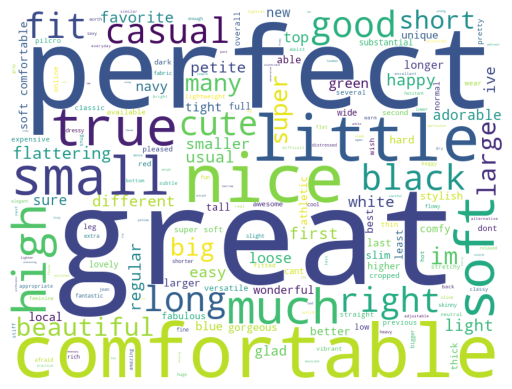

In [13]:
# Visualize adjectives for the "Bottoms" category
visualize_adjectives("Bottoms")  

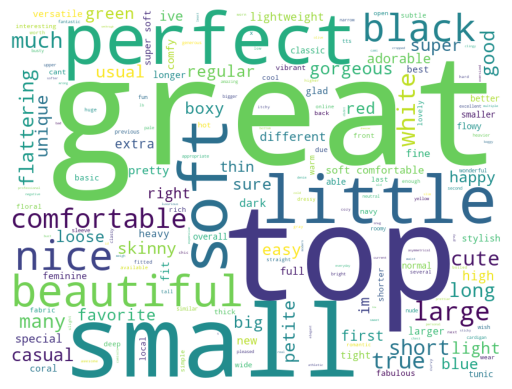

In [14]:
# Visualize adjectives for the "Tops" category
visualize_adjectives("Tops")

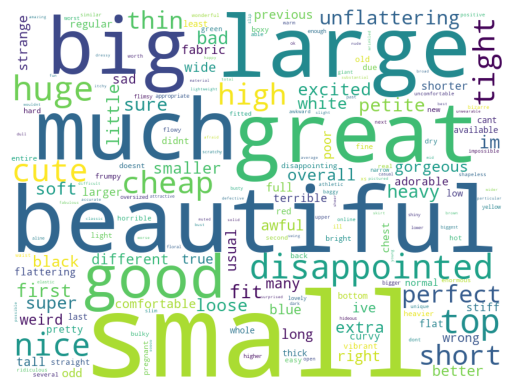

In [15]:
# Visualize adjectives for the "Dresses" category
visualize_adjectives("Dresses")

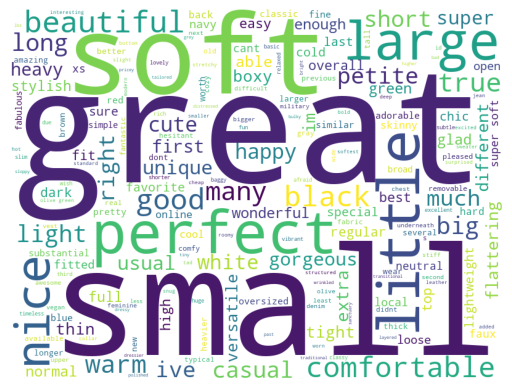

In [16]:
# Visualize adjectives for the "Jackets" category
visualize_adjectives("Jackets")

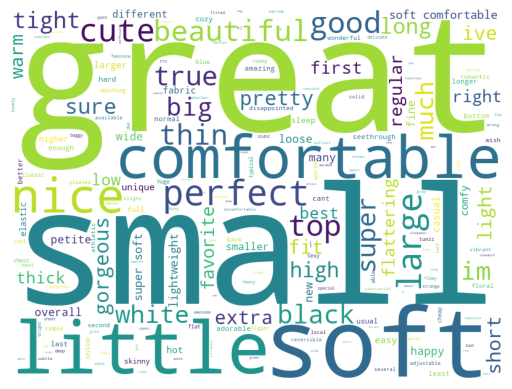

In [17]:
# Visualize adjectives for the "Initmate" category
visualize_adjectives("Intimate")

## Analyzing Sentiment Polarity Scores of Product Reviews

Understanding customer sentiment is crucial for improving products and enhancing the shopping experience. In this section, we define a function that utilizes the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to assess the sentiment polarity of product reviews. This analysis categorizes each review as positive, negative, or neutral based on the compound score derived from the text.

- **Positive**: If the compound score is greater than 0.05, the sentiment is classified as "positive," indicating favorable sentiment in the review.
- **Negative**: If the compound score is less than -0.5, the sentiment is classified as "negative," suggesting strong dissatisfaction.
- **Neutral**: If the compound score falls between -0.5 and 0.05, the sentiment is classified as "neutral," meaning the review does not convey strong sentiments in either direction.

In [18]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()
   
    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)
    
    # Getting the compound score
    compound = scores['compound']
    
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"


In [19]:
data['sentiment']=data.product_review_cleaned.apply(polarity_score)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


#### Grouping Data by Product Category and Sentiment

To analyze the sentiment distribution across different product categories, we can group the data by `product_category` and `sentiment`.

In [20]:
df=data.groupby(['product_category','sentiment']).size().reset_index(name='counts')
df

,product_category,sentiment,counts
0,Bottoms,neutral,6
1,Bottoms,positive,679
2,Dresses,negative,35
3,Dresses,neutral,76
4,Dresses,positive,570
5,Intimate,negative,3
6,Intimate,neutral,33
7,Intimate,positive,614
8,Jackets,negative,2
9,Jackets,neutral,8


### Visualizing Sentiment Distribution by Product Category

To visualize the distribution of sentiment across different product categories, we can create a grouped bar chart.

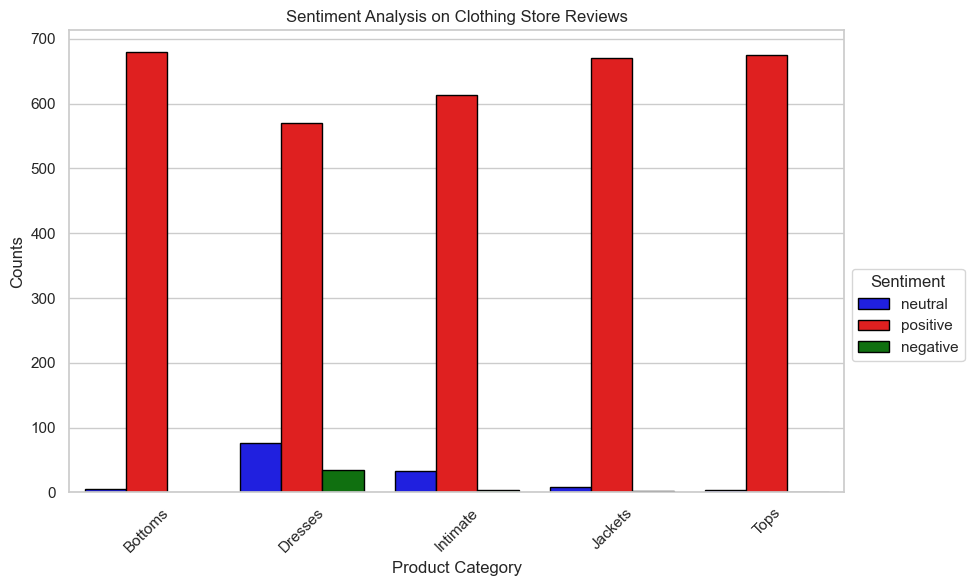

In [21]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot using seaborn 
plt.figure(figsize=(10, 6))
colors = {"neutral": "blue", "positive": "red", "negative": "green"}
sns.barplot(data=df, x="product_category", y="counts", hue="sentiment", palette=colors, edgecolor="black", errorbar=None)

plt.xlabel("Product Category")
plt.ylabel("Counts")
plt.title("Sentiment Analysis on Clothing Store Reviews")
plt.legend(title="Sentiment", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.show()


### Sentiment Analysis Conclusion

From the bar chart showing sentiment distribution across various product categories, the following insights can be drawn:

1. **Positive Sentiment Dominance**: 
   - In all product categories (Bottoms, Dresses, Intimate, Jackets, Tops), positive sentiment has a significantly higher count than both neutral and negative sentiments.
   - This suggests a high level of customer satisfaction with these products.

2. **Low Negative Sentiment**: 
   - The count of negative sentiment is very low across all product categories, indicating few complaints or instances of customer dissatisfaction.

3. **Variation in Neutral Sentiment**: 
   - Neutral sentiment is present but varies by category.
   - Categories like **Dresses** and **Intimate** show a relatively higher neutral count compared to **Bottoms**, **Jackets**, and **Tops**.

### Summary
Customers generally express a strong positive sentiment across all product categories, with very few negative feedbacks. This likely reflects good product quality or effective customer service in these categories.


***